<a href="https://colab.research.google.com/github/jfcepeda97/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/blob/master/Stack_Im%C3%A1genes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORTAR LIBRERÍAS

In [ ]:
import glob
from PIL import Image, ImageChops, ImageFilter
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from osgeo import gdal

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#CARGA DE DATA

In [ ]:
basename= '*.tif'
outdir2= '/content/drive/MyDrive/Colab Notebooks/PROYECTO SOFTWARE/RASTER_0'
filelist2= glob.glob(os.path.join(outdir2,basename))
files_string= " ".join(filelist2)
print(files_string)

/content/drive/MyDrive/Colab Notebooks/PROYECTO SOFTWARE/RASTER_0/Aspect_0.tif /content/drive/MyDrive/Colab Notebooks/PROYECTO SOFTWARE/RASTER_0/Channel Network Base Level_0.tif /content/drive/MyDrive/Colab Notebooks/PROYECTO SOFTWARE/RASTER_0/Channel Network Distance_0.tif /content/drive/MyDrive/Colab Notebooks/PROYECTO SOFTWARE/RASTER_0/Elevation_0.tif /content/drive/MyDrive/Colab Notebooks/PROYECTO SOFTWARE/RASTER_0/LS-Factor_0.tif /content/drive/MyDrive/Colab Notebooks/PROYECTO SOFTWARE/RASTER_0/Plan Curvature_0.tif /content/drive/MyDrive/Colab Notebooks/PROYECTO SOFTWARE/RASTER_0/Profile Curvature_0.tif /content/drive/MyDrive/Colab Notebooks/PROYECTO SOFTWARE/RASTER_0/Relative Slope Position_0.tif /content/drive/MyDrive/Colab Notebooks/PROYECTO SOFTWARE/RASTER_0/Slope_0.tif /content/drive/MyDrive/Colab Notebooks/PROYECTO SOFTWARE/RASTER_0/TWI_0.tif /content/drive/MyDrive/Colab Notebooks/PROYECTO SOFTWARE/RASTER_0/Vegetation_0.tif /content/drive/MyDrive/Colab Notebooks/PROYECTO SOF

#STACK DE IMÁGENES RÁSTER (14 VARIABLES)

In [ ]:
gg= gdal.BuildVRT("", filelist2, separate= True)
g= gdal.Translate("Raster_0.tif",gg, format= "GTiff")

##INFORMACIÓN DEL RESULTADO

###LECTURA DE ARCHIVOS RASTER CON GDAL

In [ ]:
dataset = gdal.Open(r'/content/Raster_0.tif')
print(dataset.RasterCount)
#El resultado final de cada una de las bandas corresponde a las variables: Banda1(Aspecto), Banda2(Channel_Network), 
#Banda3(Channel_Distance), Banda4(Elevation), Banda5(Channel_Network), Banda6(Plan_Curvature), Banda7(Profile_Network),
#Banda8(Relative_Slope_Position), Banda9(Slope), Banda10(TWI), Banda11(Vegetation), Banda12(Geology), Banda13(Distance_Faults),
#Banda14(Distance_Roads).

14


In [ ]:
dataset.GetProjection()

'PROJCS["WGS 84 / UTM zone 17S",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-81],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",10000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32717"]]'

In [ ]:
dataset.RasterXSize


5

In [ ]:
dataset.RasterYSize

5

##OBTENCIÓN DE LAS BANDAS DEL RÁSTER

In [ ]:
Aspect = dataset.GetRasterBand(1) 
Channel_Network= dataset.GetRasterBand(2) 
Channel_Distance = dataset.GetRasterBand(3) 
Distance_faults = dataset.GetRasterBand(4)
Distance_roads = dataset.GetRasterBand(5)
Geology = dataset.GetRasterBand(6) 
Elevation = dataset.GetRasterBand(7) 
LS_Factor = dataset.GetRasterBand(8) 
Plan_curvature = dataset.GetRasterBand(9) 
Profile_curvature = dataset.GetRasterBand(10) 
Relative_slope = dataset.GetRasterBand(11) 
Slope = dataset.GetRasterBand(12) 
TWI = dataset.GetRasterBand(13) 
Vegetation = dataset.GetRasterBand(14)

In [ ]:
Aspecto = Aspect.ReadAsArray()
Channel_N = Channel_Network.ReadAsArray()
Channel_D = Channel_Distance.ReadAsArray()
Distance_F = Distance_faults.ReadAsArray()
Distance_R = Distance_roads.ReadAsArray()
Geology1 = Geology.ReadAsArray()
Elevation1 = Elevation.ReadAsArray()
LS_F = LS_Factor.ReadAsArray()
Plan_c = Plan_curvature.ReadAsArray()
Profile_c = Profile_curvature.ReadAsArray()
R_slope = Relative_slope.ReadAsArray()
Slope1 = Slope.ReadAsArray()
TWI1= TWI.ReadAsArray()
Vegetation1 = Vegetation.ReadAsArray()

##LECTURA DE IMAGEN COMO ARRAY CON NUMPY

In [ ]:
img = np.dstack((Aspecto, Channel_N, Channel_D, Distance_F, Distance_R, Geology1, Elevation1, LS_F, Plan_c, Profile_c, R_slope, Slope1, TWI1, Vegetation1)) 
print(img[0][0][2])


12.936523


In [ ]:
img1 = img.reshape(1,5,5,14)
print(img1.shape)
labels = np.array([1])
print(labels.shape)

(1, 5, 5, 14)
(1,)


#RED CONVOLUCIONAL

##DEFINICIÓN DEL MODELO

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 3, 3, 32)          4064      
                                                                 
 conv2d_39 (Conv2D)          (None, 1, 1, 64)          18496     
                                                                 
 flatten_11 (Flatten)        (None, 64)                0         
                                                                 
 dense_18 (Dense)            (None, 64)                4160      
                                                                 
 dense_19 (Dense)            (None, 1)                 65        
                                                                 
Total params: 26,785
Trainable params: 26,785
Non-trainable params: 0
_________________________________________________________________


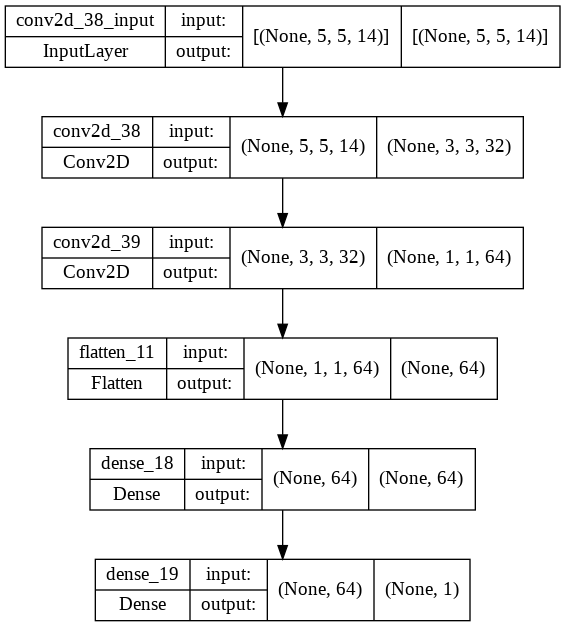

In [ ]:
from tensorflow.keras import datasets, layers, models
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(5, 5, 14)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()
tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(img1, labels, epochs=5, verbose=1)

Epoch 1/5
1/1 [==============================] - 1s 531ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/5
1/1 [==============================] - 0s 13ms/step - loss: 0.0000e+00 - accuracy: 1.0000


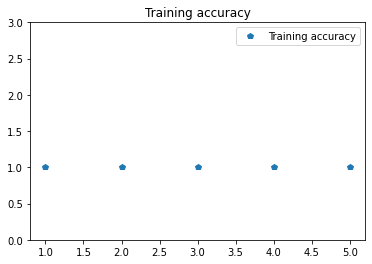

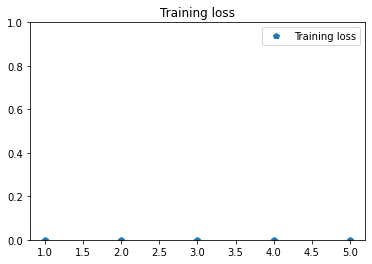

In [ ]:
acc = history.history['accuracy']
loss=history.history['loss']
epochs = range(1,len(acc)+1)

plt.figure()
plt.plot(epochs, acc, 'p', label = 'Training accuracy')
plt.title('Training accuracy')
plt.ylim(0.0,3.0)
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'p', label = 'Training loss')
plt.title('Training loss')
plt.ylim(0.0,1.0)
plt.legend()